In [15]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error


# Load the dataset and select the columns

In [16]:

df = pd.read_csv("/home/vmh/vmhdocs/Research/Inria/Anl/EnvDataAutoencoder/Data/Imputed_Metadata_metaGmetaT_by_OceanLayer.csv",sep=",")

selectcols = ["Latitude","Longitude","Depth.nominal","Temperature","Oxygen","ChlorophyllA","Carbon.total","Salinity","Gradient.Surface.temp","Fluorescence","CO3","HCO3","Density","PO4","NO3","Si","Alkalinity.total","Ammonium.5m","Lyapunov","NO2","Depth.Min.O2","NO2NO3","Nitracline","Brunt.Vaisala","Iron.5m","Depth.Max.O2","Okubo.Weiss"]
df_env = df[selectcols]

train_data = np.array(df_env)
print(train_data.shape)

inputlen = len(df_env.columns)
print(inputlen)

df_env.head(5)


(228, 27)
27


,Latitude,Longitude,Depth.nominal,Temperature,Oxygen,ChlorophyllA,Carbon.total,Salinity,Gradient.Surface.temp,Fluorescence,...,Ammonium.5m,Lyapunov,NO2,Depth.Min.O2,NO2NO3,Nitracline,Brunt.Vaisala,Iron.5m,Depth.Max.O2,Okubo.Weiss
0,35.7590,14.2574,5,21.486650,208.245000,0.013344,0.01030,37.895750,1.05130,1.091875,...,0.009120,0.066158,0.018330,221,0.118000,193,61,0.001388,60,-0.124391
1,33.9179,32.8980,5,20.442500,207.613550,0.067706,0.00500,39.423110,0.24369,1.176500,...,0.003270,0.097233,0.001250,151,0.045500,193,59,0.001388,55,-0.309549
2,37.0510,1.9378,9,23.814100,217.809833,0.189348,0.00695,37.522000,1.03750,1.183333,...,0.015245,0.000000,0.044500,167,0.143250,193,45,0.001388,37,-1.381300
3,42.2038,17.7150,5,17.211742,221.782083,0.103935,0.00500,38.228050,1.61570,1.465000,...,0.001431,0.078584,0.009125,115,0.040875,193,3,0.001388,37,-0.354776
4,39.3888,19.3905,5,18.319192,217.809833,0.104797,0.00500,38.185333,2.00910,1.465000,...,0.002327,0.000000,0.004250,174,0.035250,193,41,0.001388,37,0.369749


# Load the model and check the arquitecture

In [17]:

model = keras.models.load_model('/home/vmh/vmhdocs/Research/Inria/Anl/EnvDataAutoencoder/Code/autoenc001/modelcheckpoint')

model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 27)]              0         
                                                                 
 dense_6 (Dense)             (None, 514)               14392     
                                                                 
 batch_normalization_5 (Batc  (None, 514)              2056      
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 257)               132355    
                                                                 
 batch_normalization_6 (Batc  (None, 257)              1028      
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 3)                 774 

# Plot the arquitecture

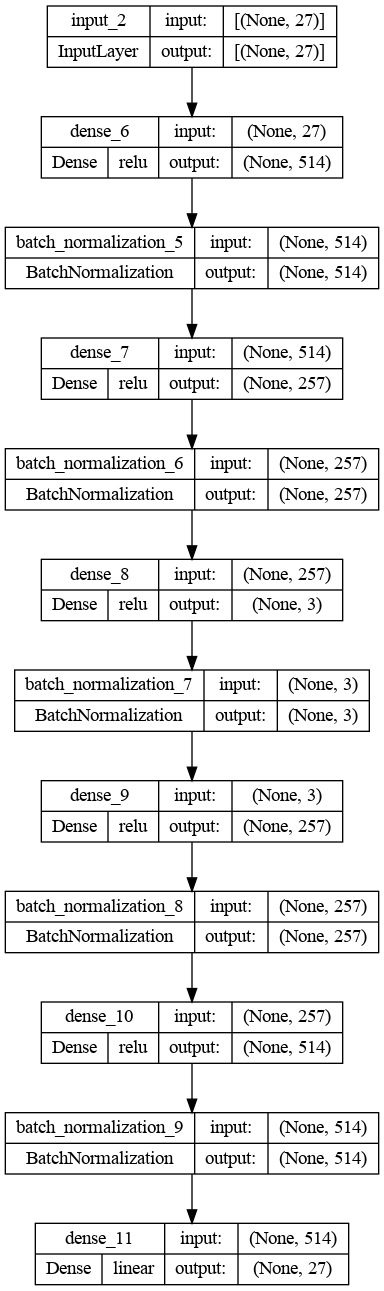

In [18]:
p_model= tf.keras.utils.plot_model(model, show_shapes=True,show_layer_activations=True,to_file='/home/vmh/vmhdocs/Research/Inria/Anl/EnvDataAutoencoder/images/model.png')
p_model

# Plot the distance between the true data and the reconstructed version

228


Text(0.5, 1.0, 'Euclidean distance between input and autoencoder output')

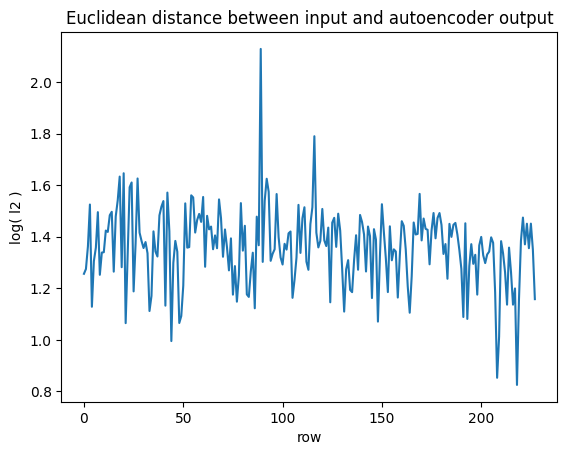

In [19]:
l2_arr = []
inputs = train_data
outputs = model(train_data).numpy()
for i in range(inputs.shape[0]):
    #print(inputs[i])
    #print(outputs[i])
    l2 = np.linalg.norm(outputs[i] - inputs[i])
    l2_arr.append(l2)
print(len(l2_arr))
p = plt.plot(np.log10(l2_arr))
plt.xlabel("row")
plt.ylabel("log( l2 )")
plt.title("Euclidean distance between input and autoencoder output")



# Plot each datum vs its reconstructed version to check how well the autoencoder is doing pointwise

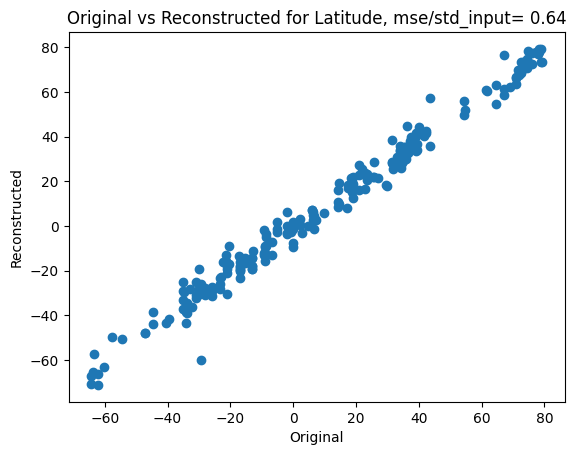

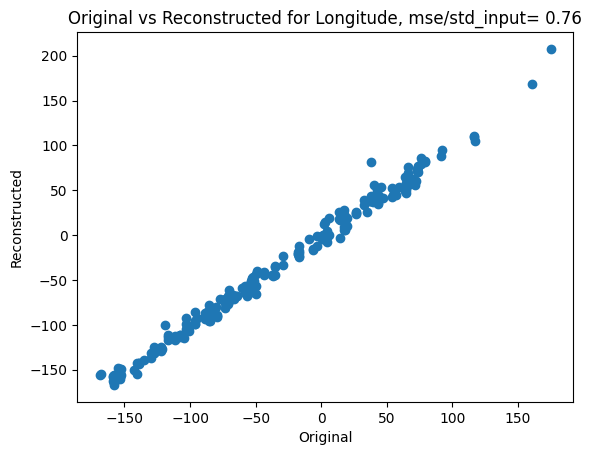

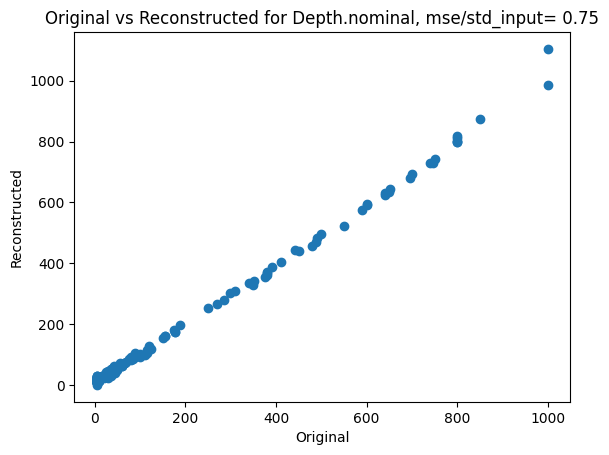

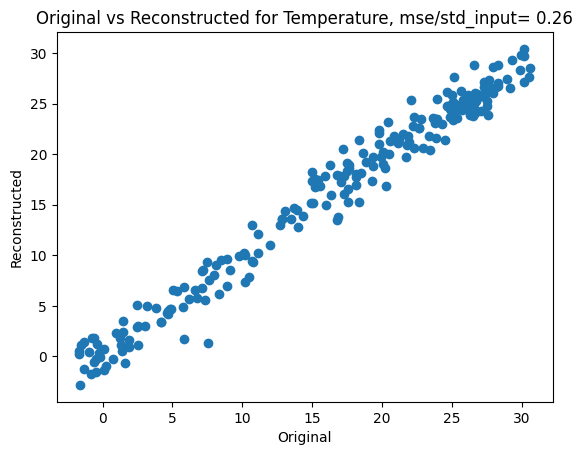

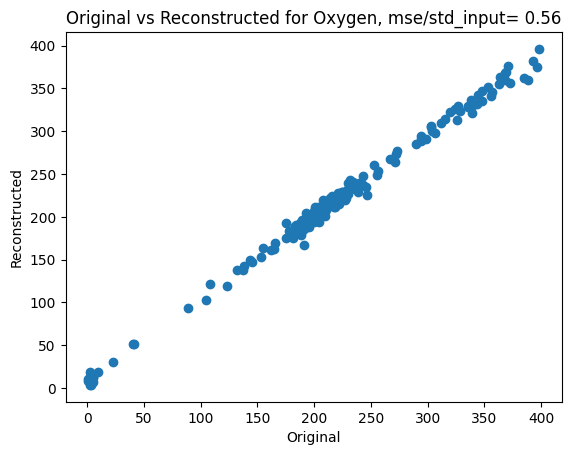

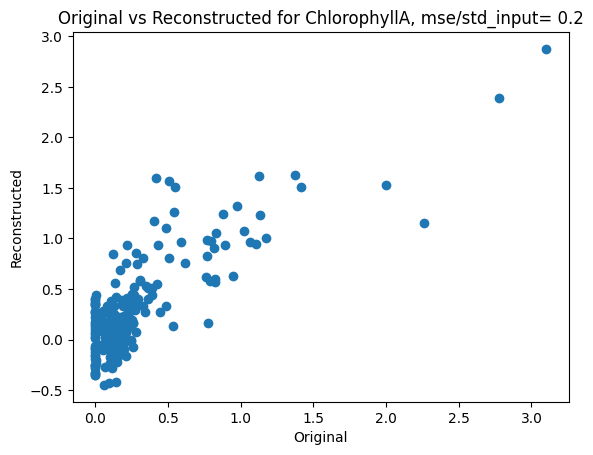

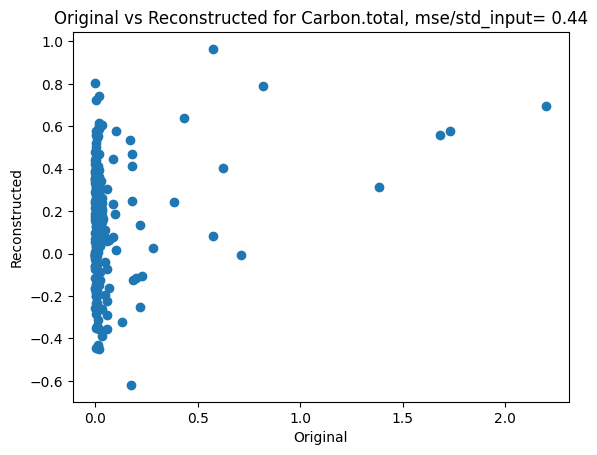

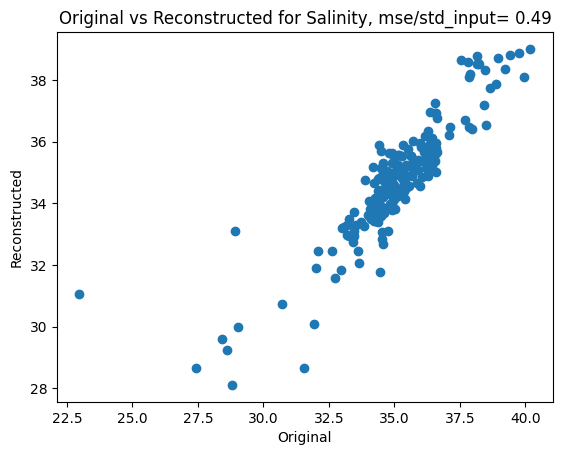

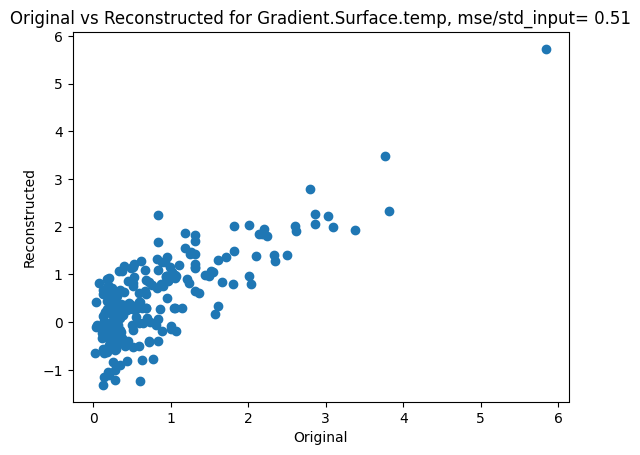

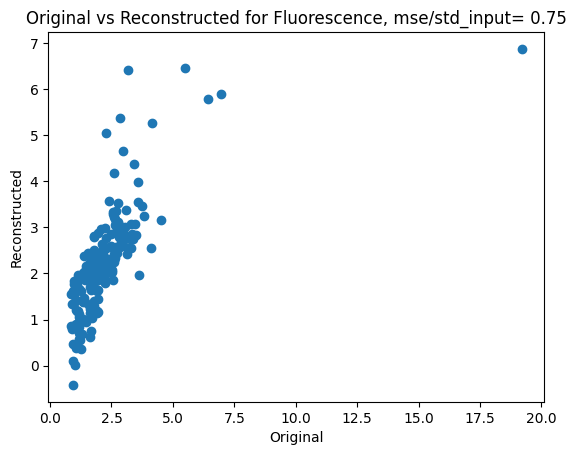

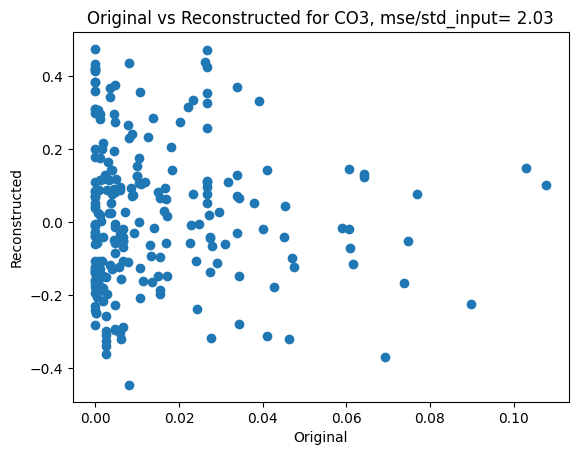

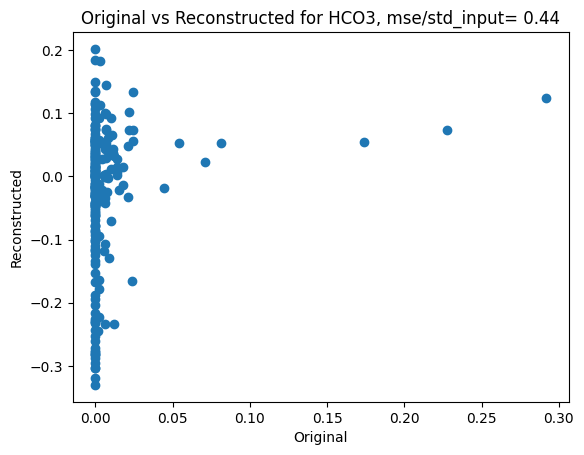

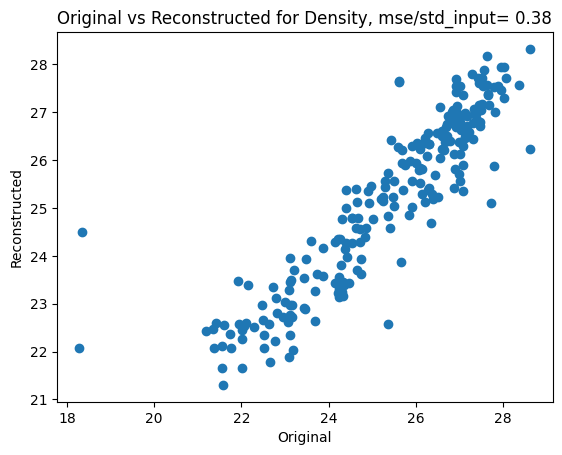

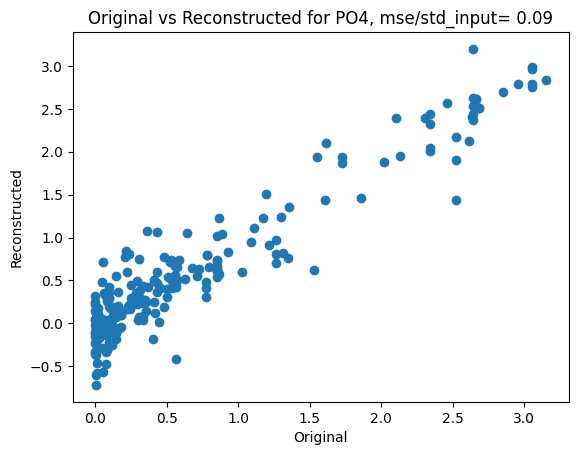

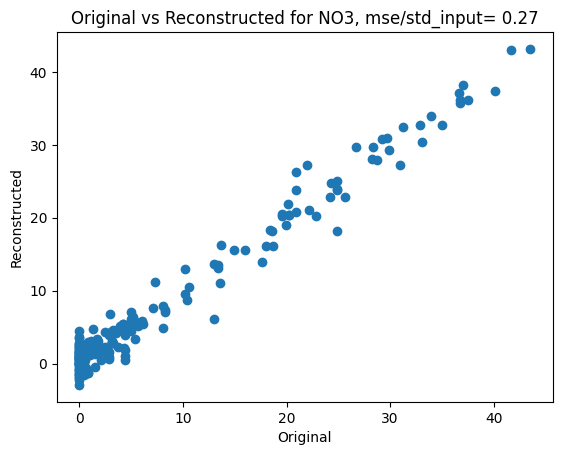

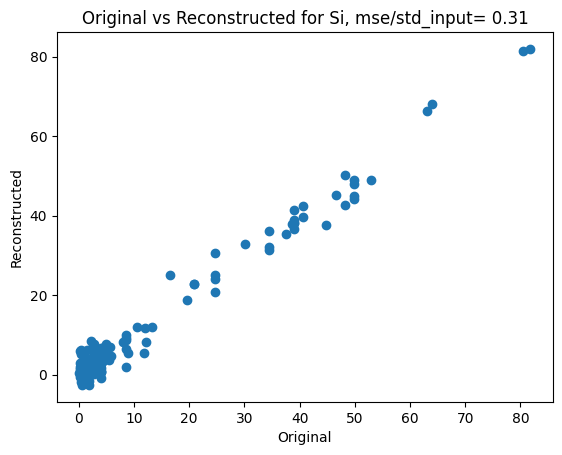

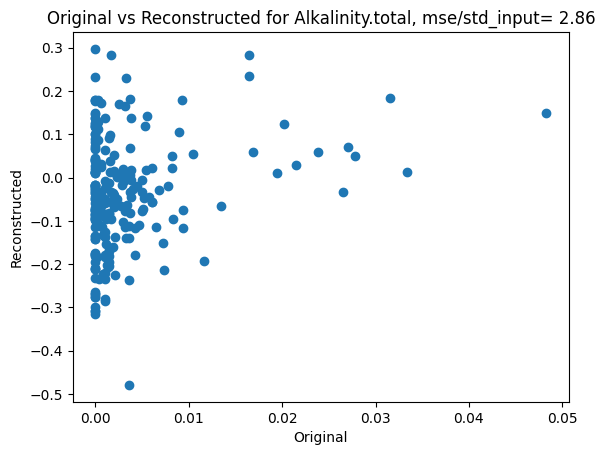

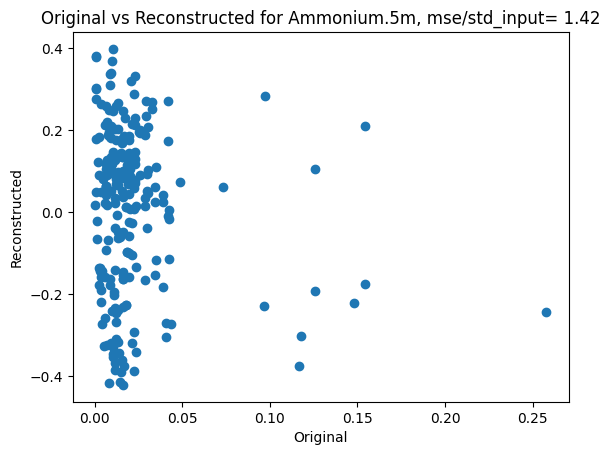

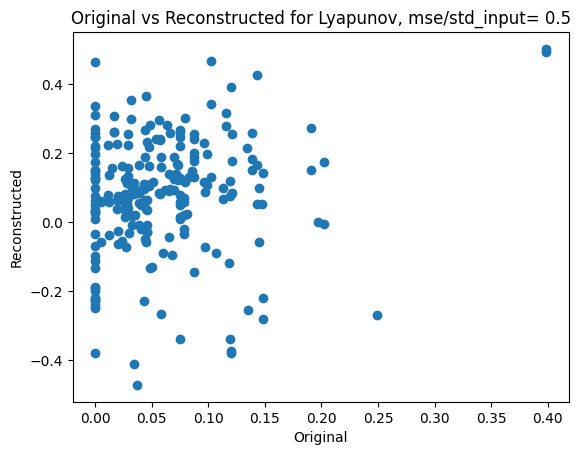

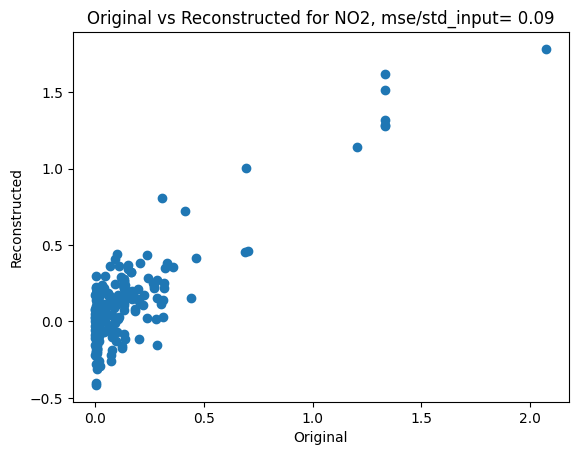

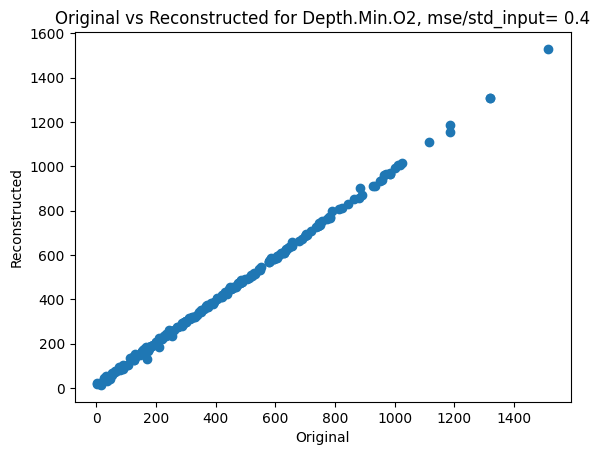

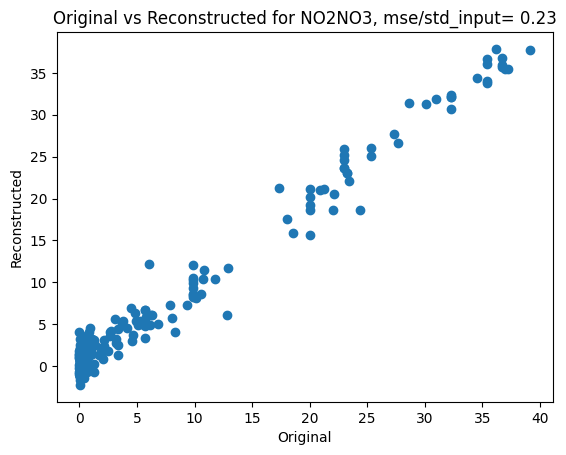

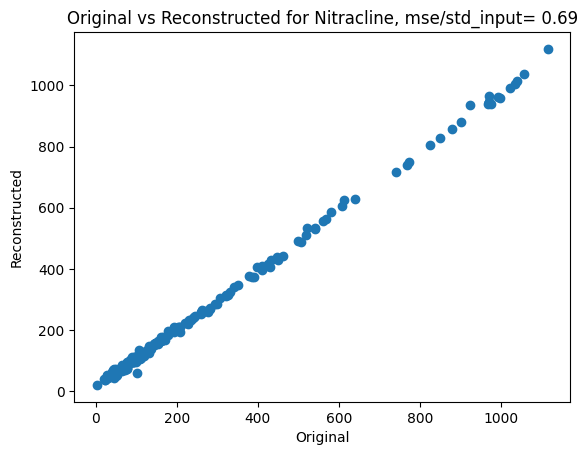

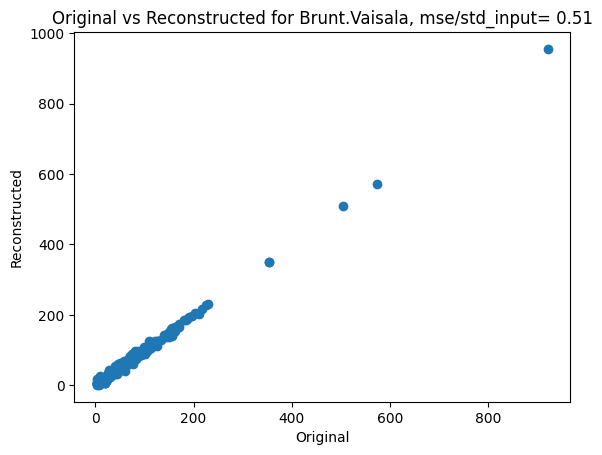

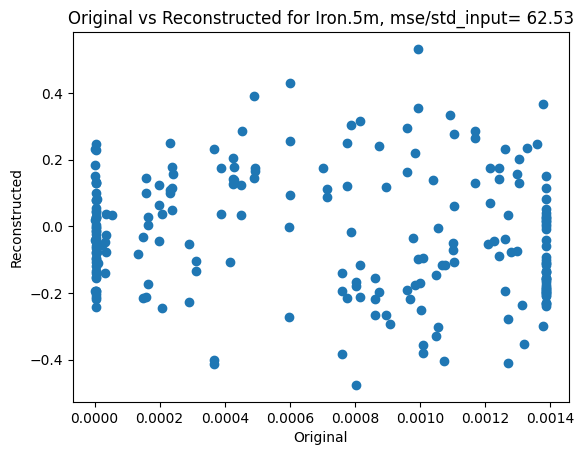

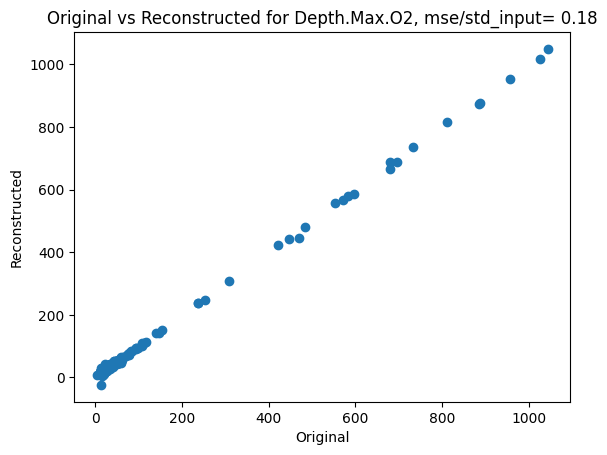

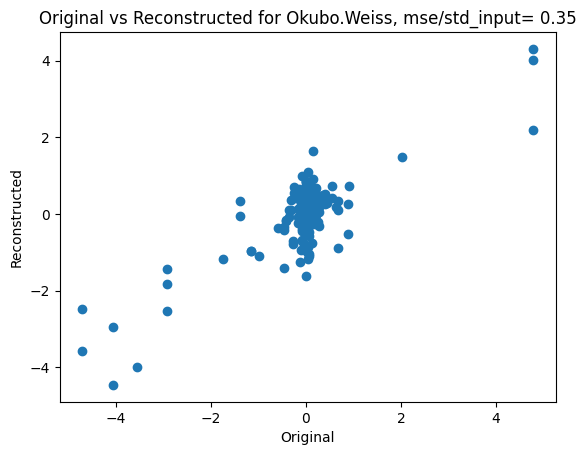

In [20]:

for j in range(inputs.shape[1]):
    inp_arr = []
    out_arr = []
    for i in range(inputs.shape[0]):
        inp_arr.append(inputs[i,j])
        out_arr.append(outputs[i,j])
    
    mse = mean_squared_error(out_arr,inp_arr)
    mse_standardized = mse/np.std(inp_arr)
    mse_standardized = round(mse_standardized,2)
    p = plt.scatter(inp_arr,out_arr)
    plt.xlabel("Original")
    plt.ylabel("Reconstructed")
    plt.title("Original vs Reconstructed for "+df_env.columns[j]+", mse/std_input= "+ str(mse_standardized ) )
    plt.show()
    


In [21]:
def get_encoderlayers(input):
    inputlayer = model.get_layer(index=0)(input)
    encoderl1 = model.get_layer(index=1)(inputlayer)
    encoderl2 = model.get_layer(index=2)(encoderl1)
    return encoderl1, encoderl2

def get_decoderlayers(input):
    inputlayer = model.get_layer(index=0)(input)
    encoderl1 = model.get_layer(index=1)(inputlayer)
    encoderl2 = model.get_layer(index=2)(encoderl1)
    bottleneck = model.get_layer(index=3)(encoderl2)
    decoderl1 = model.get_layer(index=4)(bottleneck)
    decoderl2 = model.get_layer(index=5)(decoderl1)
    return decoderl1, decoderl2




def get_bottleneck(input):
    bottleneck = model.get_layer(index=0)(input)
    bottleneck = model.get_layer(index=1)(bottleneck)
    bottleneck = model.get_layer(index=2)(bottleneck)
    bottleneck = model.get_layer(index=3)(bottleneck)
    bottleneck = model.get_layer(index=4)(bottleneck)
    bottleneck = model.get_layer(index=5)(bottleneck)
    return bottleneck



data = train_data[:1]
data.shape

encoder_layers = get_encoderlayers(data)
decoder_layers = get_decoderlayers(data)
bottleneck = get_bottleneck(data)


# Plot the bottleneck of the autoencoder, colored by catergorical variables.

In [22]:
coded = get_bottleneck(train_data)
coded = pd.DataFrame(coded.numpy(), columns = ['dim1','dim2','dim3'])
for n in df.columns:
    if type(df[n][1])==str:
        print(n)
        print(type(df[n][1]))
        fig = px.scatter_3d(coded, x="dim1", y="dim2",z="dim3",title = "Color coded by "+n ,color = df[n],color_discrete_sequence=px.colors.qualitative.Plotly)
        fig.update_traces(marker_size = 3,opacity=1)
        #fig.update_layout(autosize=False,width=40,height=30,)
        fig.show()
        fig.write_image("/home/vmh/vmhdocs/Research/Inria/Anl/EnvDataAutoencoder/Code/autoenc001/images/bottleneck_coloredby_"+n+".png")
   


Ocean.name
<class 'str'>


Layer
<class 'str'>


Polar
<class 'str'>


# Plot the bottleneck of the autoencoder, colored by numerical variables.

In [23]:
coded = get_bottleneck(train_data)
coded = pd.DataFrame(coded.numpy(), columns = ['dim1','dim2','dim3'])
for n in df.columns:
    if type(df[n][1])!=str:
        fig = px.scatter_3d(coded, x="dim1", y="dim2",z="dim3",title = "Color coded by "+n ,color = df[n],color_discrete_sequence=px.colors.qualitative.Plotly)
        fig.update_traces(marker_size = 3,opacity=1)
        #fig.update_layout(autosize=False,width=40,height=30,)
        fig.show()
        fig.write_image("/home/vmh/vmhdocs/Research/Inria/Anl/EnvDataAutoencoder/Code/autoenc001/images/bottleneck_coloredby_"+n+".png")

Finalmente, lo que mejor explica las variables en el espacio latente son los nitratos, el oxigeno(depthminO2) y los fosfatos y iron.